In [2]:
5

5

### The Law of Large Numbers

In [3]:
import random
random.seed(54321)

In [4]:
# Define a variable for our sample size, set it equal to 10
sample_size = 100

- Create empty list to collect the results of our coin flip experiment

In [5]:
# Here we create for loop and collect the result in a list
result_list = []

for i in range(sample_size):
    result = random.randint(0,1)
    result_list.append(result)

- Define two variables to compile the results

In [6]:
num_of_heads = sum(result_list)
avg_of_heads = float(num_of_heads) / sample_size

In [7]:
# print the results
print(f'Results: {num_of_heads} heads out of {sample_size} flips.')
print(f'Average number of heads per flip is {avg_of_heads}.')


Results: 51 heads out of 100 flips.
Average number of heads per flip is 0.51.


- Now change the size of sample to 100, and do it again!

---

### Coin Flipping Average over Time

In [8]:
import random
import matplotlib.pyplot as plt
random.seed(54321)

- Define the sample size

In [9]:
sample_size = 20000

- Initialize the variables required for our loop

In [10]:
# 1 = heads and 0 = tails
num_of_heads = 0
heads_list = []
trials_list = []
freq_list = []

- Run the simulation!

In [11]:
for i in range(1, sample_size+1):
    result = random.randint(0,1)
    if result == 1:
        num_of_heads += 1

    avg_of_heads = float(num_of_heads)/i
    heads_list.append(num_of_heads)
    trials_list.append(i)
    freq_list.append(avg_of_heads)


# Print the results
print(f'Results: {num_of_heads} heads out of {sample_size} flips.')
print(f'Average number of heads is {avg_of_heads}')

Results: 10008 heads out of 20000 flips.
Average number of heads is 0.5004


- Create the line graph, to show the sample mean over time, along with marking our expected value using a dashed line

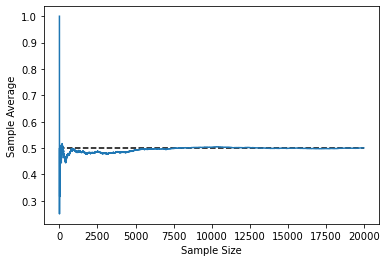

In [12]:
plt.plot(trials_list, freq_list)
plt.ylabel('Sample Average')
plt.xlabel('Sample Size')
plt.hlines(0.50,0,sample_size, linestyles='dashed')
plt.show()

---

### Calculating the Avg Winnings for a Game of Roulette If We Constantly Bet on Red

In [13]:
import random
import matplotlib.pyplot as plt
random.seed(54321)

In [14]:
# Create variable for the sample size and set it to 10, variable bet, and set it to $1

sample_size = 100
bet = 1

- Initialize the variables that we will use to collect the results of our simulation

In [15]:
net_money = 0
wins = 0
money_track = []
trials_track = []

# Run the simulation 
for i in range(1, sample_size+1):
    result = random.randint(1,38)
    if result%2==1 and result!=37:
        net_money += bet
        wins += 1
    
    else:
        net_money = bet
    
    money_track.append(net_money/i)
    trials_track.append(i)

In [16]:
print(f'Results: You won {wins} games out of{sample_size} and won an average of {net_money/sample_size} dollars per game')
print(f'Results: You are expected to win {((18/38)*bet+(20/38)*(-bet))} per game')


Results: You won 55 games out of100 and won an average of 0.01 dollars per game
Results: You are expected to win -0.05263157894736842 per game


- Create the graph of the expected value of the net chyange in money per game and the sample average of the net change in money per game

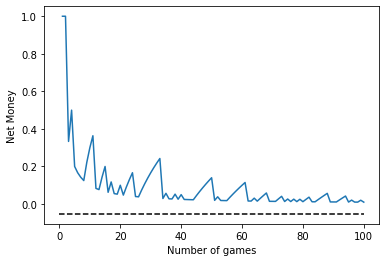

In [17]:
plt.plot(trials_track, money_track)
plt.ylabel('Net Money')
plt.xlabel('Number of games')
plt.hlines(((18/38)*bet+(20/38)*(-bet)), 0, sample_size, linestyles='dashed')
plt.show()

### Showing the Sample Mean for a Uniform Distribution

Here we will draw a random sample from a random number generator that generates random numbers between 0 and 100. Thenm we calculates the sample average

In [18]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats
random.seed(54321)

- Create a variable for the size of each sample and the total number of samples that you want to take. Since the CLT states that we need a sufficiently large sample, we have selected a sample size of 30. Next, we are going to need a lot of sample means to graph and have set that value equal to 10,000

In [19]:
sample_size = 30
calc_means = 10000

- Initialize the list that will be used to collect our sample means, and run through our simulation the specified number of times, collecting the sample mean of each sample

In [20]:
mean_list = []

for j in range(calc_means):
    sample_list = [] # This used to track our results
    for j in range(sample_size):
        sample_list.append(random.randint(0, 100))
    
    sample_mean = sum(sample_list)/sample_size
    mean_list.append(sample_mean)

- Create the histogram of the sample means that we collected

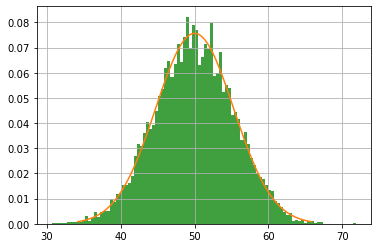

In [21]:
n, bins, patches = plt.hist(mean_list, math.floor(math.sqrt(calc_means)),density=True,facecolor='g',alpha=0.75)
plt.grid(True)

mu = 50
sigma = math.sqrt(((100 ** 2) / 12)) / (math.sqrt(sample_size))
x = np.linspace(mu -3 * sigma, mu+3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

### Taking a Sample from an Exponential Distribution

In [22]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats

# Create sample size
sample_size = 5
calc_means = 10000

- Initialize the variable that we will use to collect the results of our simulation. Run the simulation, but this time sample from an exponential distribution rather than a uniform distribution

In [23]:
mean_list = []

# Run the loop to collect a sample
for j in range(calc_means):
    sample_list = []
    for i in range(sample_size):
        draw = np.random.exponential(1)
        sample_list.append(draw)
    sample_mean = sum(sample_list)/sample_size
    mean_list.append(sample_mean)

- Create a histogram of the sample means we collected and overlay what the CLT says we should expect from it

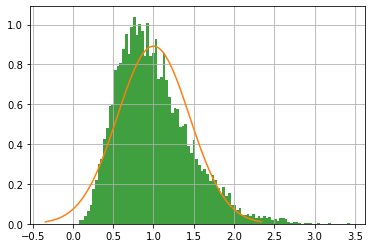

In [24]:
n, bins, patches = plt.hist(mean_list, \
                   math.floor(math.sqrt(calc_means)), \
                   density=True, facecolor='g', \
                   alpha=0.75)
plt.grid(True)
mu = 1
sigma = 1 / (math.sqrt(sample_size))
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

---

### Finding the Confidence Interval of Polling Figures

Ceritanya anda sedang menjalankan kampanye politik, di mana anda memutuskan untuk menjalankan 30 kelompok fokus dengan sekitar 10 orang di setiap kelompok. Anda mendapatkan hasilnya, dan ingin melaporkan kepada kandidat anda, jumlah orang yang akan memilih merka dalam kelompok 10 orang biasa. Karena ada bebrapa variabilitas di setiap kelompok fokus, Anda memutuskan bahwa cara yang paling akurat adalah dengan memberikan interval kepercayaan yakni 95% interval. Anda mengasumsikan dari pengalaman dengan standar deviasi 2.89.

In [25]:
import random
random.seed(39809)

- Initialize sample list, and collect our samples from our focus groups. From here, we just enter the information into our function

In [26]:
def z_confidence_interval(data, st_dev, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math
    sample_mean = st.mean(data)
    n = len(data)
    crit_value = sp.norm.ppf(((1 - con_lvl) / 2) + \
                             con_lvl)
    lower_limit = sample_mean - (crit_value * \
                                 (st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value * \
                                  (st_dev / math.sqrt(n)))
    print (f'Your {con_lvl} z confidence interval is ({lower_limit}, {higher_limit})')
    return (lower_limit,higher_limit)


In [27]:
sample_list = []

for i in range(30):
    sample_list.append(random.randint(0,10))

z_confidence_interval(sample_list,2.89,0.95)

Your 0.95 z confidence interval is (3.965845784931483, 6.034154215068517)


(3.965845784931483, 6.034154215068517)

This tell us that in a typical focus group, anywhere between 4 to 6 people in each group will vote for our candidate. This signals to you that the campaign should keep working harder to convince more people to vote for your candidate

---

In [28]:
def t_confidence_interval(data, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math

    sample_mean = st.mean(data)
    sample_st_dev = st.stdev(data)

    n = len(data)

    crit_value = sp.t.ppf(((1-con_lvl)/2)+con_lvl, n-1)
    lower_limit = sample_mean - (crit_value*(sample_st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value*(sample_st_dev/math.sqrt(n)))

    print(f'Your {con_lvl} t confidence interval is ({lower_limit},{higher_limit})')
    return (lower_limit, higher_limit)

t_confidence_interval(sample_list, 0.95)

Your 0.95 t confidence interval is (3.827357936126168,6.172642063873832)


(3.827357936126168, 6.172642063873832)

In [29]:
def prop_confidenct_interval(p_hat, n, con_lvl):
    import math
    import scipy.stats as sp
    crit_value = sp.norm.ppf(((1 - con_lvl) / 2) + \
                             con_lvl)
    lower_limit = p_hat - (crit_value * (math.sqrt(\
                 (p_hat * (1-p_hat)) / n)))
    higher_limit = p_hat + (crit_value * (math.sqrt(\
                  (p_hat * (1 - p_hat)) / n)))
    print(f'Your {con_lvl} proportional confidence \
interval is ({lower_limit},{higher_limit})')
    return (lower_limit,higher_limit)

prop_confidenct_interval(0.54,350, 0.95)

Your 0.95 proportional confidence interval is (0.4877856513683282,0.5922143486316719)


(0.4877856513683282, 0.5922143486316719)

### Z-Test in Action

In [30]:
import scipy.stats as st
import numpy as np
import pandas as pd
import math as mt
import statistics as stat
import statsmodels.stats.weightstats as mod
import statsmodels.stats.proportion as prop

np.random.seed(12345)

- Write a function to do the test. The inputs will be a sample, std, value of our hypothesis, significance level, and test type (upper, lower, or two tailed test). We will calculate the sample mean and sample size from given list, after that we will take the inputs and calculate our test statistic. Finally, we compare our p-value to the level significance, if it less than a standard, we reject the null hypothesis, and otherwise

In [31]:
def z_test(sample, pop_st_dev, hypoth_value, sig_level, test_type):
    sample_mean = stat.mean(sample)
    sample_size = len(sample)

    test_statistic = (sample_mean - hypoth_value)/(pop_st_dev/(mt.sqrt(sample_size)))

    if test_type == 'lower':
        p_value = st.norm.cdf(test_statistic)

    if test_type == 'upper':
        p_value = 1 - st.norm.cdf(test_statistic)

    if test_type == 'two':
        p_value = 2*(1-st.norm.cdf(abs(test_statistic)))
    
    print(f'P Value = {p_value}')

    if p_value < sig_level:
        print(f'Results are significant. Reject the Null')

    else:
        print("Do not reject the Null")

- We draw a random sample size of 50 from a normal distribution with a mean of 15 and a standard deviation of 1. We will print the sample mean to the console so we know what it is (it will be different every time you run this code since we take a random sample every time). We use our z-test function to conduct a lower-tailed test since we want to see whether our mean is significantly less than 16. We specify the list that contains our data (data1), the population standard deviation (we know this is 1), the value of the hypothesis (we want to see whether it is significantly less than 16), the level of significance (most of the time this will be 0.05), and finally the type of test (since we want to see whether the mean is lower than 16, this is a lower-tailed test)

In [32]:
# Lower tailed test
data1 = np.random.normal(15,1,50)

# Test to see if mean is significantly less than 16
print(f'Sample mean: {stat.mean(data1)}')

z_test(data1,1,16,0.05,'lower')

Sample mean: 14.94804802516884
P Value = 5.094688086201483e-14
Results are significant. Reject the Null


Because the p-value is less than 0.05, this's true if the sample mean is under than 16

- Let's test to see wether our mean is significantly larger than 14

In [33]:
print(f'Sample mean: {stat.mean(data1)}')
z_test(data1,1,14,0.05,'upper')

Sample mean: 14.94804802516884
P Value = 1.0159539876042345e-11
Results are significant. Reject the Null


Still, because this's under 15

- For the final test, perform two tailed test, and see whether our sample mean differs significantly from 15

In [34]:
print(f'Sample mean: {stat.mean(data1)}')
z_test(data1,1,15,0.05,'two')

Sample mean: 14.94804802516884
P Value = 0.7133535345453159
Do not reject the Null


---

### T-Test

Here we use two different samples, one for large and one for small sample. Both will be randomly selected from a normal distibution from a mean of 50 and std of 10. The only difference between the two samples is that the large sample will have a size of 100, and the smaller sample will have a size of 10.

In [35]:
import scipy.stats as st
import numpy as np
import pandas as pd
import math as mt
import statistics as stat
import statsmodels.stats.weightstats as mod
import statsmodels.stats.proportion as prop

np.random.seed(1)
data1 = np.random.normal(50,10,100)

- Create function for t-test

In [36]:
def t_test(sample, hypoth_value, sig_level, test_type):
    sample_mean = stat.mean(sample)
    sample_st_dev = stat.stdev(sample)
    sample_size = len(sample)
    test_statistic = (sample_mean - hypoth_value)/(sample_st_dev/(mt.sqrt(sample_size)))

    if test_type == 'lower':
        p_value = st.t.cdf(test_statistic,df=sample_size-1)
    
    if test_type == 'upper':
        p_value = 1 - st.t.cdf(test_statistic,df=sample_size-1)
    
    if test_type == 'two':
        p_value = 2 * (1 - st.t.cdf(abs(test_statistic), df=sample_size-1))

    print(f'P Value = {p_value}')

    if p_value < sig_level:
        print("Reject Null")
    else:
        print("Do not reject Null")

- Now we will run three different tests.

In [37]:
print('large sample')
print(f'Sample mean: {stat.mean(data1)}')
t_test(data1,50,0.05,'two')
t_test(data1,51,0.05,'lower')
t_test(data1,48,0.05,'upper')

large sample
Sample mean: 50.60582852075699
P Value = 0.49746099844105474
Do not reject Null
P Value = 0.32933701868279674
Do not reject Null
P Value = 0.002109341573010348
Reject Null


- Next, we will run the same three tests, only this time we will use a sample with a size of 5, whereas they are different one by one

In [38]:
data2 = data1[:5]
print(data2)
#two-tailed test = Is the sample mean significantly
#different from 50?
print('small sample')
print(f'Sample mean: {stat.mean(data2)}')
t_test(data2,50,0.05,'two')
#lower tailed = Is the sample mean significantly
#lower than 51?
t_test(data2,51,0.05,'lower')
#upper tailed = is the sample mean significantly
#more than 48?
t_test(data2,48,0.05,'upper')

[66.24345364 43.88243586 44.71828248 39.27031378 58.65407629]
small sample
Sample mean: 50.553712409836436
P Value = 0.918572770568147
Do not reject Null
P Value = 0.4671568669546634
Do not reject Null
P Value = 0.32103491333328793
Do not reject Null


### A/B Testing Example

Here we have two samples, one drawn from a normal distribution with a mean of 50, and another drawn from a normal distribution with a mean of 100. Both samples have a size of 100. In this exercise, we're going to determine whether the sample mean of one sample is significantly different, lower, or higher than the other

In [39]:
import scipy.stats as st
import numpy as np

- Draw our random samples and print the sample means, so we know what they are remember to set the seed

In [40]:
np.random.seed(16172)
sample1 = np.random.normal(50,10,100)
sample2 = np.random.normal(100,10,100)
print(f'Sample mean 1: {stat.mean(sample1)}')
print(f'Sample mean 2: {stat.mean(sample2)}')

Sample mean 1: 50.54824784997514
Sample mean 2: 97.95949096047315


- Perform 2-sample t-test using the function from scipy

In [41]:
two_tail_results = st.ttest_ind(sample1, sample2, equal_var=False)
print(two_tail_results)

Ttest_indResult(statistic=-33.72952277672986, pvalue=6.3445365508664585e-84)


- If we want to test whether the mean of sample 2 is significantly greater than sample 1, switch the position of sample 1 and sample 2 in the function

In [42]:
upper_tail = st.ttest_ind(sample2, sample1, equal_var=False)
print(upper_tail)

Ttest_indResult(statistic=33.72952277672986, pvalue=6.3445365508664585e-84)


---

### Linear Regression

In [44]:
import pandas as pd
import statistics as st
import scipy.stats as sp
import math
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

import numpy as np
data = pd.read_csv("winequality-red.csv")

- Subset the data to the two columns we need. Set the pH level as our dependent variable and critic acid as the independent variable

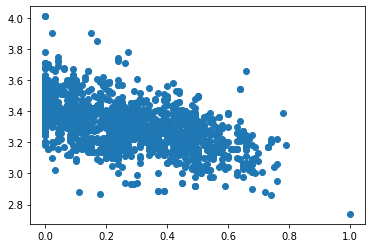

In [45]:
data1 = data[['pH','citric acid']]

plt.scatter(x=data1['citric acid'],y=data1['pH'])

y = data1['pH']
x = data1[['citric acid']]

- Fit the linear model and graph the data as scatter plot and the regression model

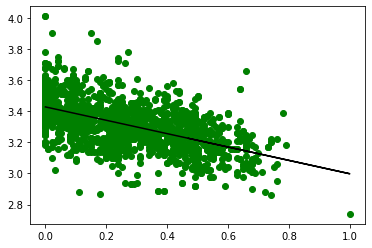

In [46]:
model = lm.LinearRegression()
model.fit(x,y)
plt.scatter(x,y,color='g')
plt.plot(x, model.predict(x),color='k')
plt.show()

- Next, set our independent variables as citric acid and residual sugar and fit the model

In [47]:
data2 = data[['pH','citric acid','residual sugar']]

y = data2['pH']
x = data2[['citric acid', 'residual sugar']]

model = lm.LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

- Create 3D scatter plot to check whether it fits our data well

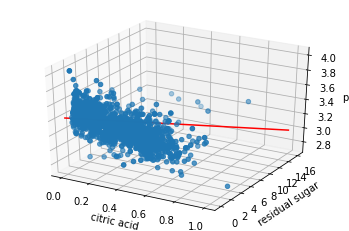

In [48]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data2['citric acid'],data2['residual sugar'],data2['pH'])
threedee.set_xlabel('citric acid')
threedee.set_ylabel('residual sugar')
threedee.set_zlabel('pH')

xline = np.linspace(0,1,100)
yline = np.linspace(0,16,100)
zline = xline*(-0.429) + yline*(-0.000877) + 3.430

threedee.plot3D(xline, yline, zline, 'red')
plt.show()

---

### Standarized Test Performance

Here we will construct a linear model that will predict another variable

You are given the task of describing the results of the 2015 PISA test and investigating possible effects of the prevalence of internet infrastructure on test scores.

In [49]:
import pandas as pd

data = pd.read_csv('pisa_test_scores.csv')

- Use the t-confidence interval function to calculate 95% confidence interval

In [50]:
print("For Math:")
t_confidence_interval(list(data['Math']),0.95)
print("For Reading:")
t_confidence_interval(list(data['Reading']),0.95)
print("For Science:")
t_confidence_interval(list(data['Science']),0.95)

For Math:
Your 0.95 t confidence interval is (448.2561338314995,473.6869804542148)
For Reading:
Your 0.95 t confidence interval is (449.1937943789569,472.80078847818595)
For Science:
Your 0.95 t confidence interval is (453.8991748650865,476.9790108491992)


(453.8991748650865, 476.9790108491992)

Sepertinya kita dapat mengatakan dengan keyakinan 95% bahwa skor rata-rata dalam matematika untuk suatu negara adalah antara 448,3 dan 473,7 , antara 449,2 dan 472,8 untuk membaca, dan antara 453,9 dan 477,0 untuk sains.

- Next, divide the dataset into two different datasets, one where there are more than 50 internet users per 100 people, and another where there are 50 or fewer internet users per 100 people

In [52]:
# Use hypothesis Test to evaluate whether having

data1 = data[data['internet_users_per_100']>50]
data0 = data[data['internet_users_per_100']<50]

print(data1)
print(data0)

   Country Code  internet_users_per_100      Math   Reading   Science
0           ALB               63.252933  413.1570  405.2588  427.2250
1           ARE               90.500000  427.4827  433.5423  436.7311
2           ARG               68.043064  409.0333  425.3031  432.2262
3           AUS               84.560519  493.8962  502.9006  509.9939
4           AUT               83.940142  496.7423  484.8656  495.0375
..          ...                     ...       ...       ...       ...
62          SWE               90.610200  493.9181  500.1556  493.4224
64          TTO               69.198471  417.2434  427.2733  424.5905
66          TUR               53.744979  420.4540  428.3351  425.4895
67          URY               64.600000  417.9919  436.5721  435.3630
68          USA               74.554202  469.6285  496.9351  496.2424

[63 rows x 5 columns]
   Country Code  internet_users_per_100      Math   Reading   Science
19          DZA               38.200000  359.6062  349.8593  375.74

Here we have 2 datasets. Notice how data1 has all the countries, and data0 has 50 or fewer

- Since we are going to compare two samples with likely different variances, here we will use 2-sample t-test. Our significance level is going to be 5%. Since we want to test to see whether the internet users' majority mean is higher, this will be an upper-tailed test. This means that we will have to divide our p-value by 2 and only accept the results as significant if the test statistic is positive

In [55]:
import scipy.stats as sp

math_test_results = sp.ttest_ind(data1['Math'],data0['Math'],equal_var=False)
print("Math")
print(math_test_results.statistic)
print(math_test_results.pvalue / 2)

reading_test_results = sp.ttest_ind(data1['Reading'],data0['Reading'],equal_var=False)
print("\n\nReading")
print(reading_test_results.statistic)
print(reading_test_results.pvalue / 2)

science_test_results = sp.ttest_ind(data1['Science'],data0['Science'],equal_var=False)
print("\n\nScience")
print(science_test_results.statistic)
print(science_test_results.pvalue / 2)


Math
3.6040958108257892
0.003661826264299647


Reading
3.8196670837378237
0.0028727977455195778


Science
2.734488895919944
0.014259363259381578


- Next, build a linear regression model that describes mathematics scores in terms of reading and science scores. First, extract the scores from our DataFrame, put mathematics scores in their own DataFrame, separate from reading and science scores. Use Linear Regression function from sklearn, and assign it to its own variable. Then, we will fir the model using smaller DataFrames. Finally, print intercept and the coefficients of regression equation

In [56]:
import sklearn.linear_model as lm

y = data['Math']
x = data[['Science','Reading']]

model = lm.LinearRegression()
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

[1.02301989 0.0516567 ]
-38.99549267679225


- Graph the points and the regression and notice that the linear model fits the data well

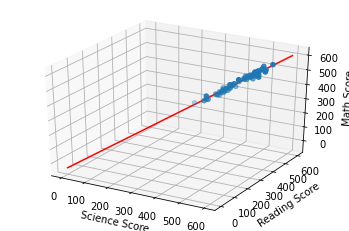

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['Science'], data['Reading'],data['Math'])
threedee.set_xlabel('Science Score')
threedee.set_ylabel('Reading Score')
threedee.set_zlabel('Math Score')

xline = np.linspace(0, 600, 600)
yline = np.linspace(0, 600, 600)
zline = xline*1.02301989 + yline*0.0516567-38.99549267679242

threedee.plot3D(xline, yline, zline, 'red')
plt.show()
